# Multivariate Linear Regression Mathmatical

In [75]:
import math , copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('LAPTOPS_DATA.csv')

In [3]:
df.head()

,Unnamed: 0,Company,Type,RAM,Weight,Price,Touchpad,LPS,PPI,CPU,HDD,SSD,GPU,OS
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [4]:
# df.isna().sum()
df.drop(['Unnamed: 0'], axis =1 , inplace = True)

In [5]:
df.head()

,Company,Type,RAM,Weight,Price,Touchpad,LPS,PPI,CPU,HDD,SSD,GPU,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [6]:
df.columns

Index(['Company', 'Type', 'RAM', 'Weight', 'Price', 'Touchpad', 'LPS', 'PPI',
       'CPU', 'HDD', 'SSD', 'GPU', 'OS'],
      dtype='object')

In [7]:
X = df.drop(['Price'], axis =1)
y  =df['Price']

In [8]:
X.columns

Index(['Company', 'Type', 'RAM', 'Weight', 'Touchpad', 'LPS', 'PPI', 'CPU',
       'HDD', 'SSD', 'GPU', 'OS'],
      dtype='object')

In [247]:
# import matplotlib.pyplot as plt
# import math

# # Select the columns for X
# X_columns = ['Company', 'Type', 'RAM', 'Weight', 'Touchpad', 'LPS', 'PPI', 'CPU', 'HDD', 'SSD', 'GPU', 'OS']

# # Extract the X_train data based on these columns
# X_train = df[X_columns].values

# # Define the labels for the features
# X_features = X_columns

# # Define the target variable
# y_train = df['Price']

# # Calculate the number of rows and columns for subplots
# num_features = len(X_features)
# num_rows = math.ceil(num_features / 4)
# num_cols = min(num_features, 4)

# # Create subplots
# fig, ax = plt.subplots(num_rows, num_cols, figsize=(25, 14), sharey=True)

# # Flatten the ax array to iterate through it
# ax = ax.flatten()

# # Create scatter plots for each feature
# for i in range(num_features):
#     ax[i].scatter(X_train[:, i], y_train)
#     ax[i].set_xlabel(X_features[i])

# # Set common ylabel
# ax[0].set_ylabel("Price (1000's)")

# # Remove any empty subplots
# for i in range(num_features, len(ax)):
#     fig.delaxes(ax[i])
# # 
# # Show the plot
# plt.tight_layout()
# plt.show()


In [10]:
df.head(5)

,Company,Type,RAM,Weight,Price,Touchpad,LPS,PPI,CPU,HDD,SSD,GPU,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [83]:
df.columns

Index(['Company', 'Type', 'RAM', 'Weight', 'Price', 'Touchpad', 'LPS', 'PPI',
       'CPU', 'HDD', 'SSD', 'GPU', 'OS'],
      dtype='object')

In [86]:
# df.info()
# df.isna().sum()

In [87]:
def custom_encode(df, column_name):
    unique_values = df[column_name].unique()
    encoding_dict = {value: index for index, value in enumerate(unique_values)}
    df[column_name] = df[column_name].map(encoding_dict)

# Encode object features
for column in df.columns:
    if df[column].dtype == 'object':
        custom_encode(df, column)

In [245]:
df.head()

,Company,Type,RAM,Weight,Price,Touchpad,LPS,PPI,CPU,HDD,SSD,GPU,OS
0,0,0,8,1.37,71378.6832,0,1,226.983005,0,0,128,0,0
1,0,0,8,1.34,47895.5232,0,0,127.677940,0,0,0,0,0
2,1,1,8,1.86,30636.0000,0,0,141.211998,0,0,256,0,1
3,0,0,16,1.83,135195.3360,0,1,220.534624,1,0,512,1,0
4,0,0,8,1.37,96095.8080,0,1,226.983005,0,0,256,0,0


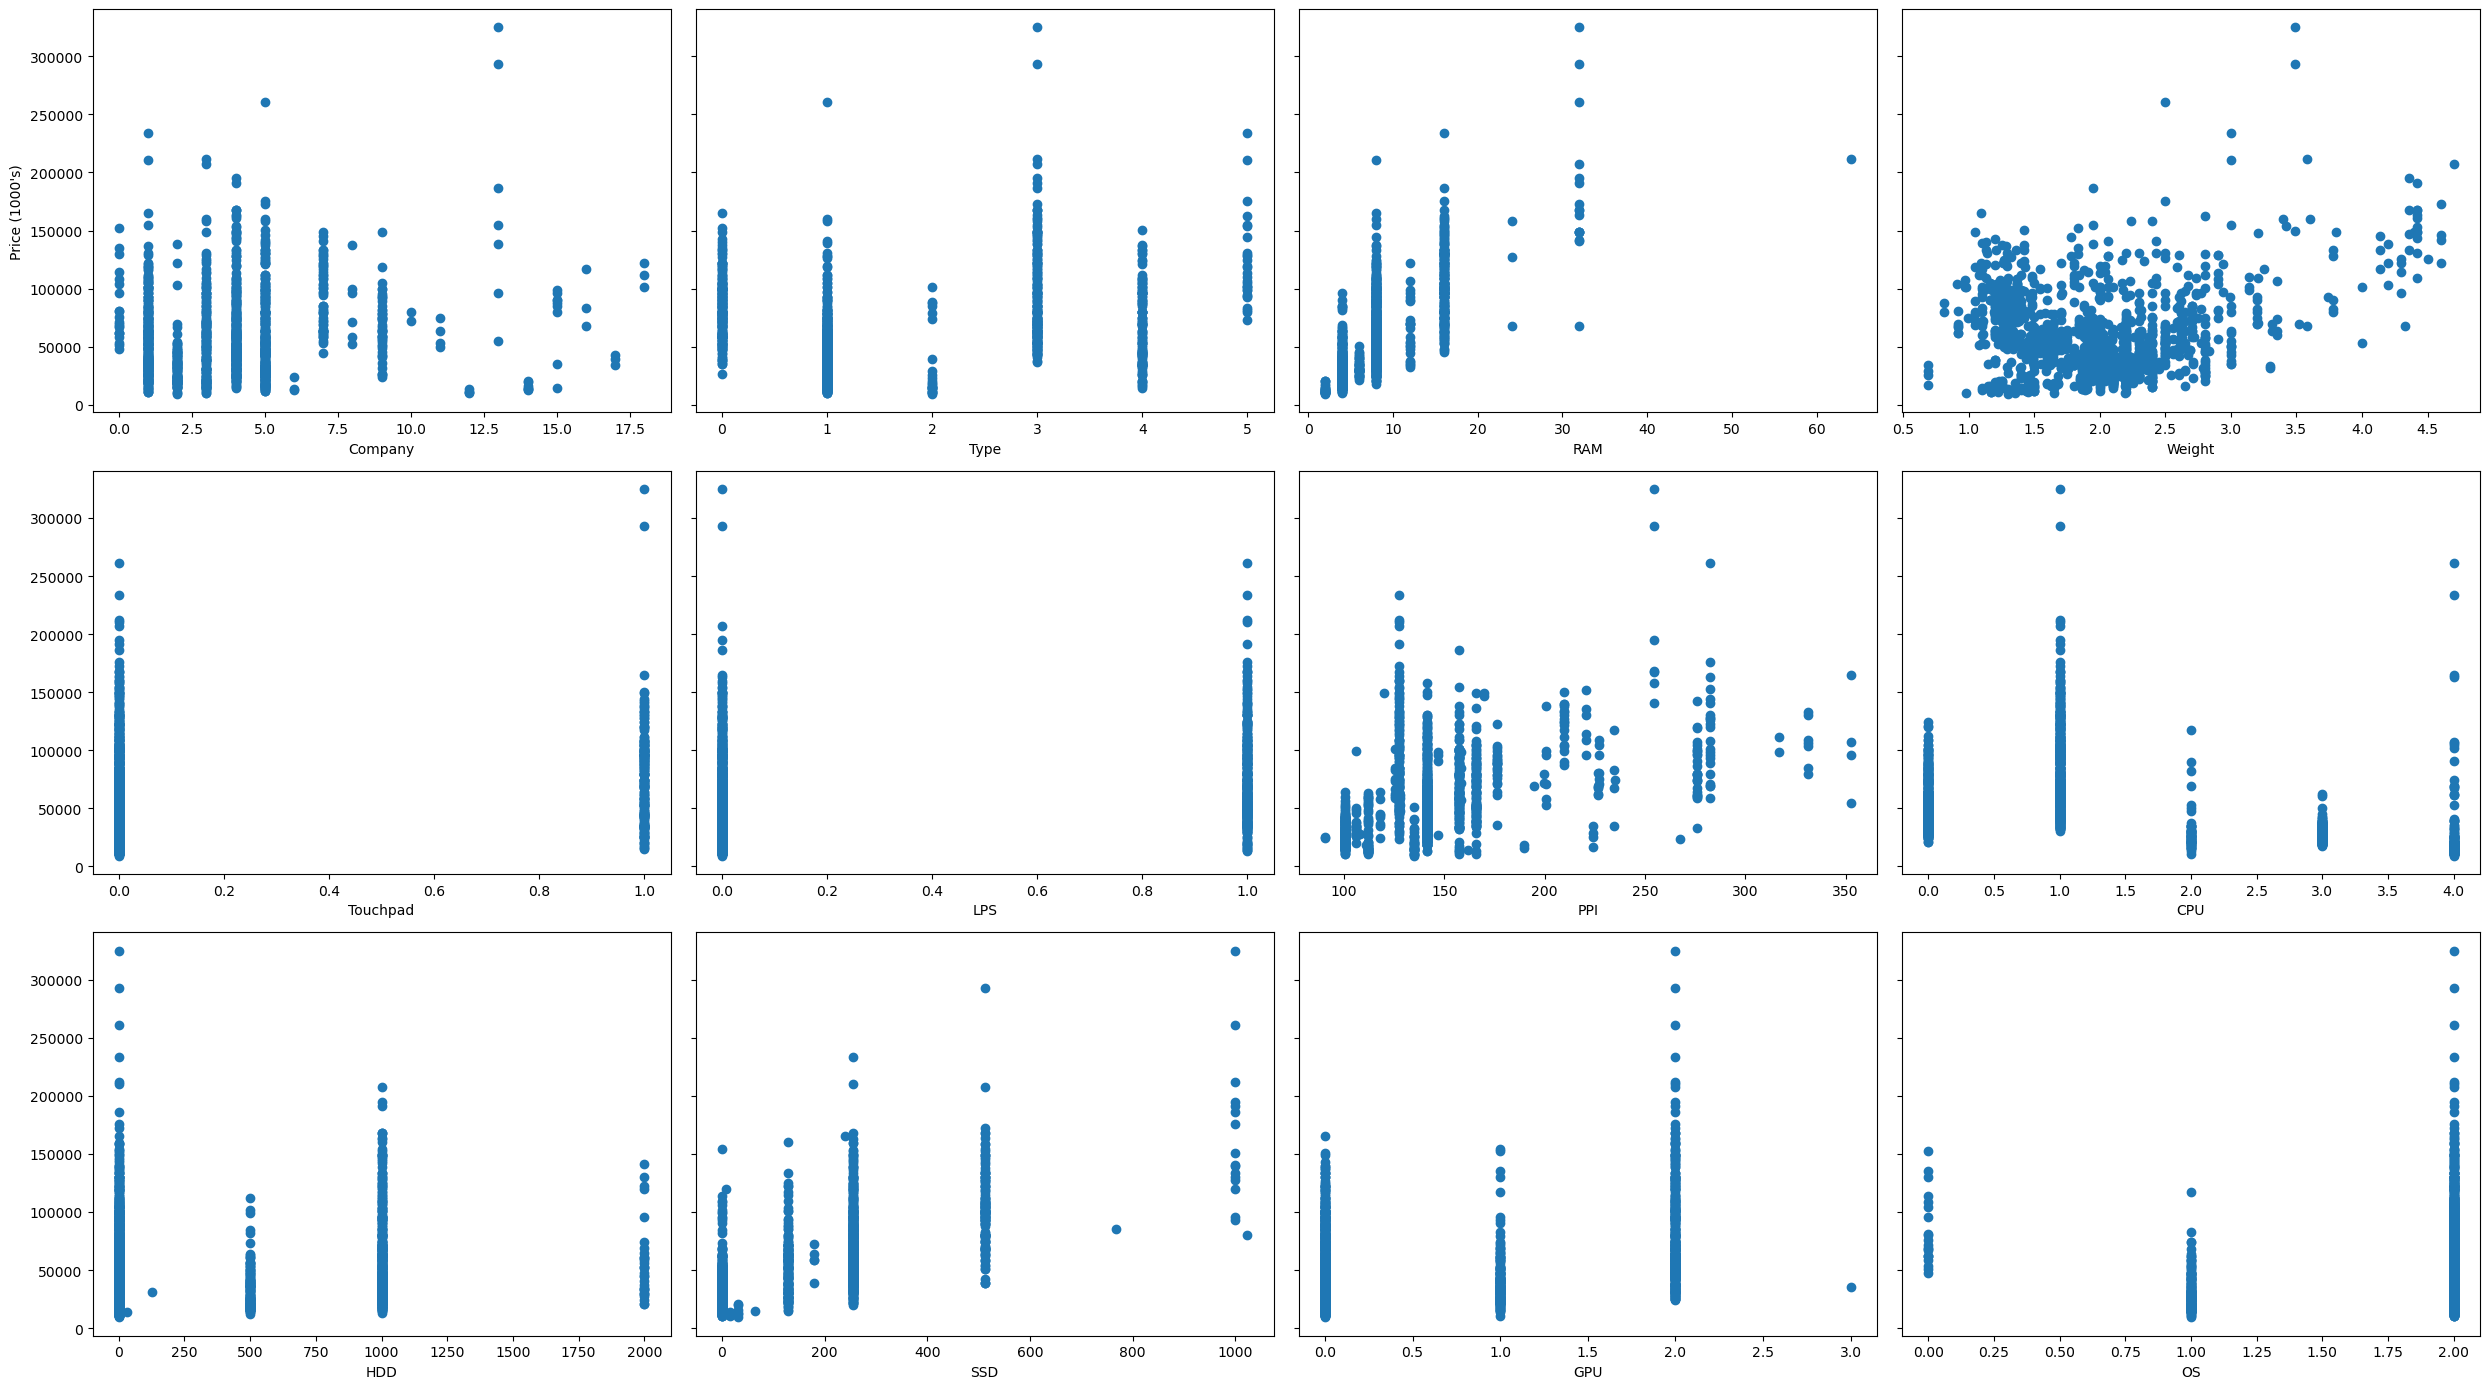

In [248]:
import matplotlib.pyplot as plt
import math

# Select the columns for X
X_columns = ['Company', 'Type', 'RAM', 'Weight', 'Touchpad', 'LPS', 'PPI', 'CPU', 'HDD', 'SSD', 'GPU', 'OS']

# Extract the X_train data based on these columns
X_train = df[X_columns].values

# Define the labels for the features
X_features = X_columns

# Define the target variable
y_train = df['Price']

# Calculate the number of rows and columns for subplots
num_features = len(X_features)
num_rows = math.ceil(num_features / 4)
num_cols = min(num_features, 4)

# Create subplots
fig, ax = plt.subplots(num_rows, num_cols, figsize=(25, 14), sharey=True)

# Flatten the ax array to iterate through it
ax = ax.flatten()

# Create scatter plots for each feature
for i in range(num_features):
    ax[i].scatter(X_train[:, i], y_train)
    ax[i].set_xlabel(X_features[i])

# Set common ylabel
ax[0].set_ylabel("Price (1000's)")

# Remove any empty subplots
for i in range(num_features, len(ax)):
    fig.delaxes(ax[i])

# Show the plot
plt.tight_layout()
plt.show()


In [89]:
X = df.drop(['Price'],axis = 1)
y  = df['Price']

In [253]:
def z_score_normalization(X):
    mu = np.mean(X,axis =0)
    sigma = np.std(X,axis = 0)
    X_norm = (X-mu)/sigma
    return (X_norm, mu, sigma)

In [255]:
z_score_normalization(X)

(       Company      Type       RAM    Weight  Touchpad       LPS       PPI  \
 0    -1.420695 -1.194112 -0.075195 -1.005283 -0.415713  1.603079  1.863993   
 1    -1.420695 -1.194112 -0.075195 -1.050381 -0.415713 -0.623799 -0.439813   
 2    -1.057151 -0.424232 -0.075195 -0.268684 -0.415713 -0.623799 -0.125833   
 3    -1.420695 -1.194112  1.498767 -0.313782 -0.415713  1.603079  1.714395   
 4    -1.420695 -1.194112 -0.075195 -1.005283 -0.415713  1.603079  1.863993   
 ...        ...       ...       ...       ...       ...       ...       ...   
 1298  0.397025  1.885409 -0.862176 -0.358880  2.405506  1.603079  0.248569   
 1299  0.397025  1.885409  1.498767 -1.110512  2.405506  1.603079  3.002393   
 1300  0.397025 -0.424232 -1.255667 -0.809859 -0.415713 -0.623799 -0.805033   
 1301 -1.057151 -0.424232 -0.468686  0.227393 -0.415713 -0.623799 -1.071373   
 1302 -0.330063 -0.424232 -0.862176  0.242426 -0.415713 -0.623799 -1.071373   
 
            CPU       HDD       SSD       GPU     

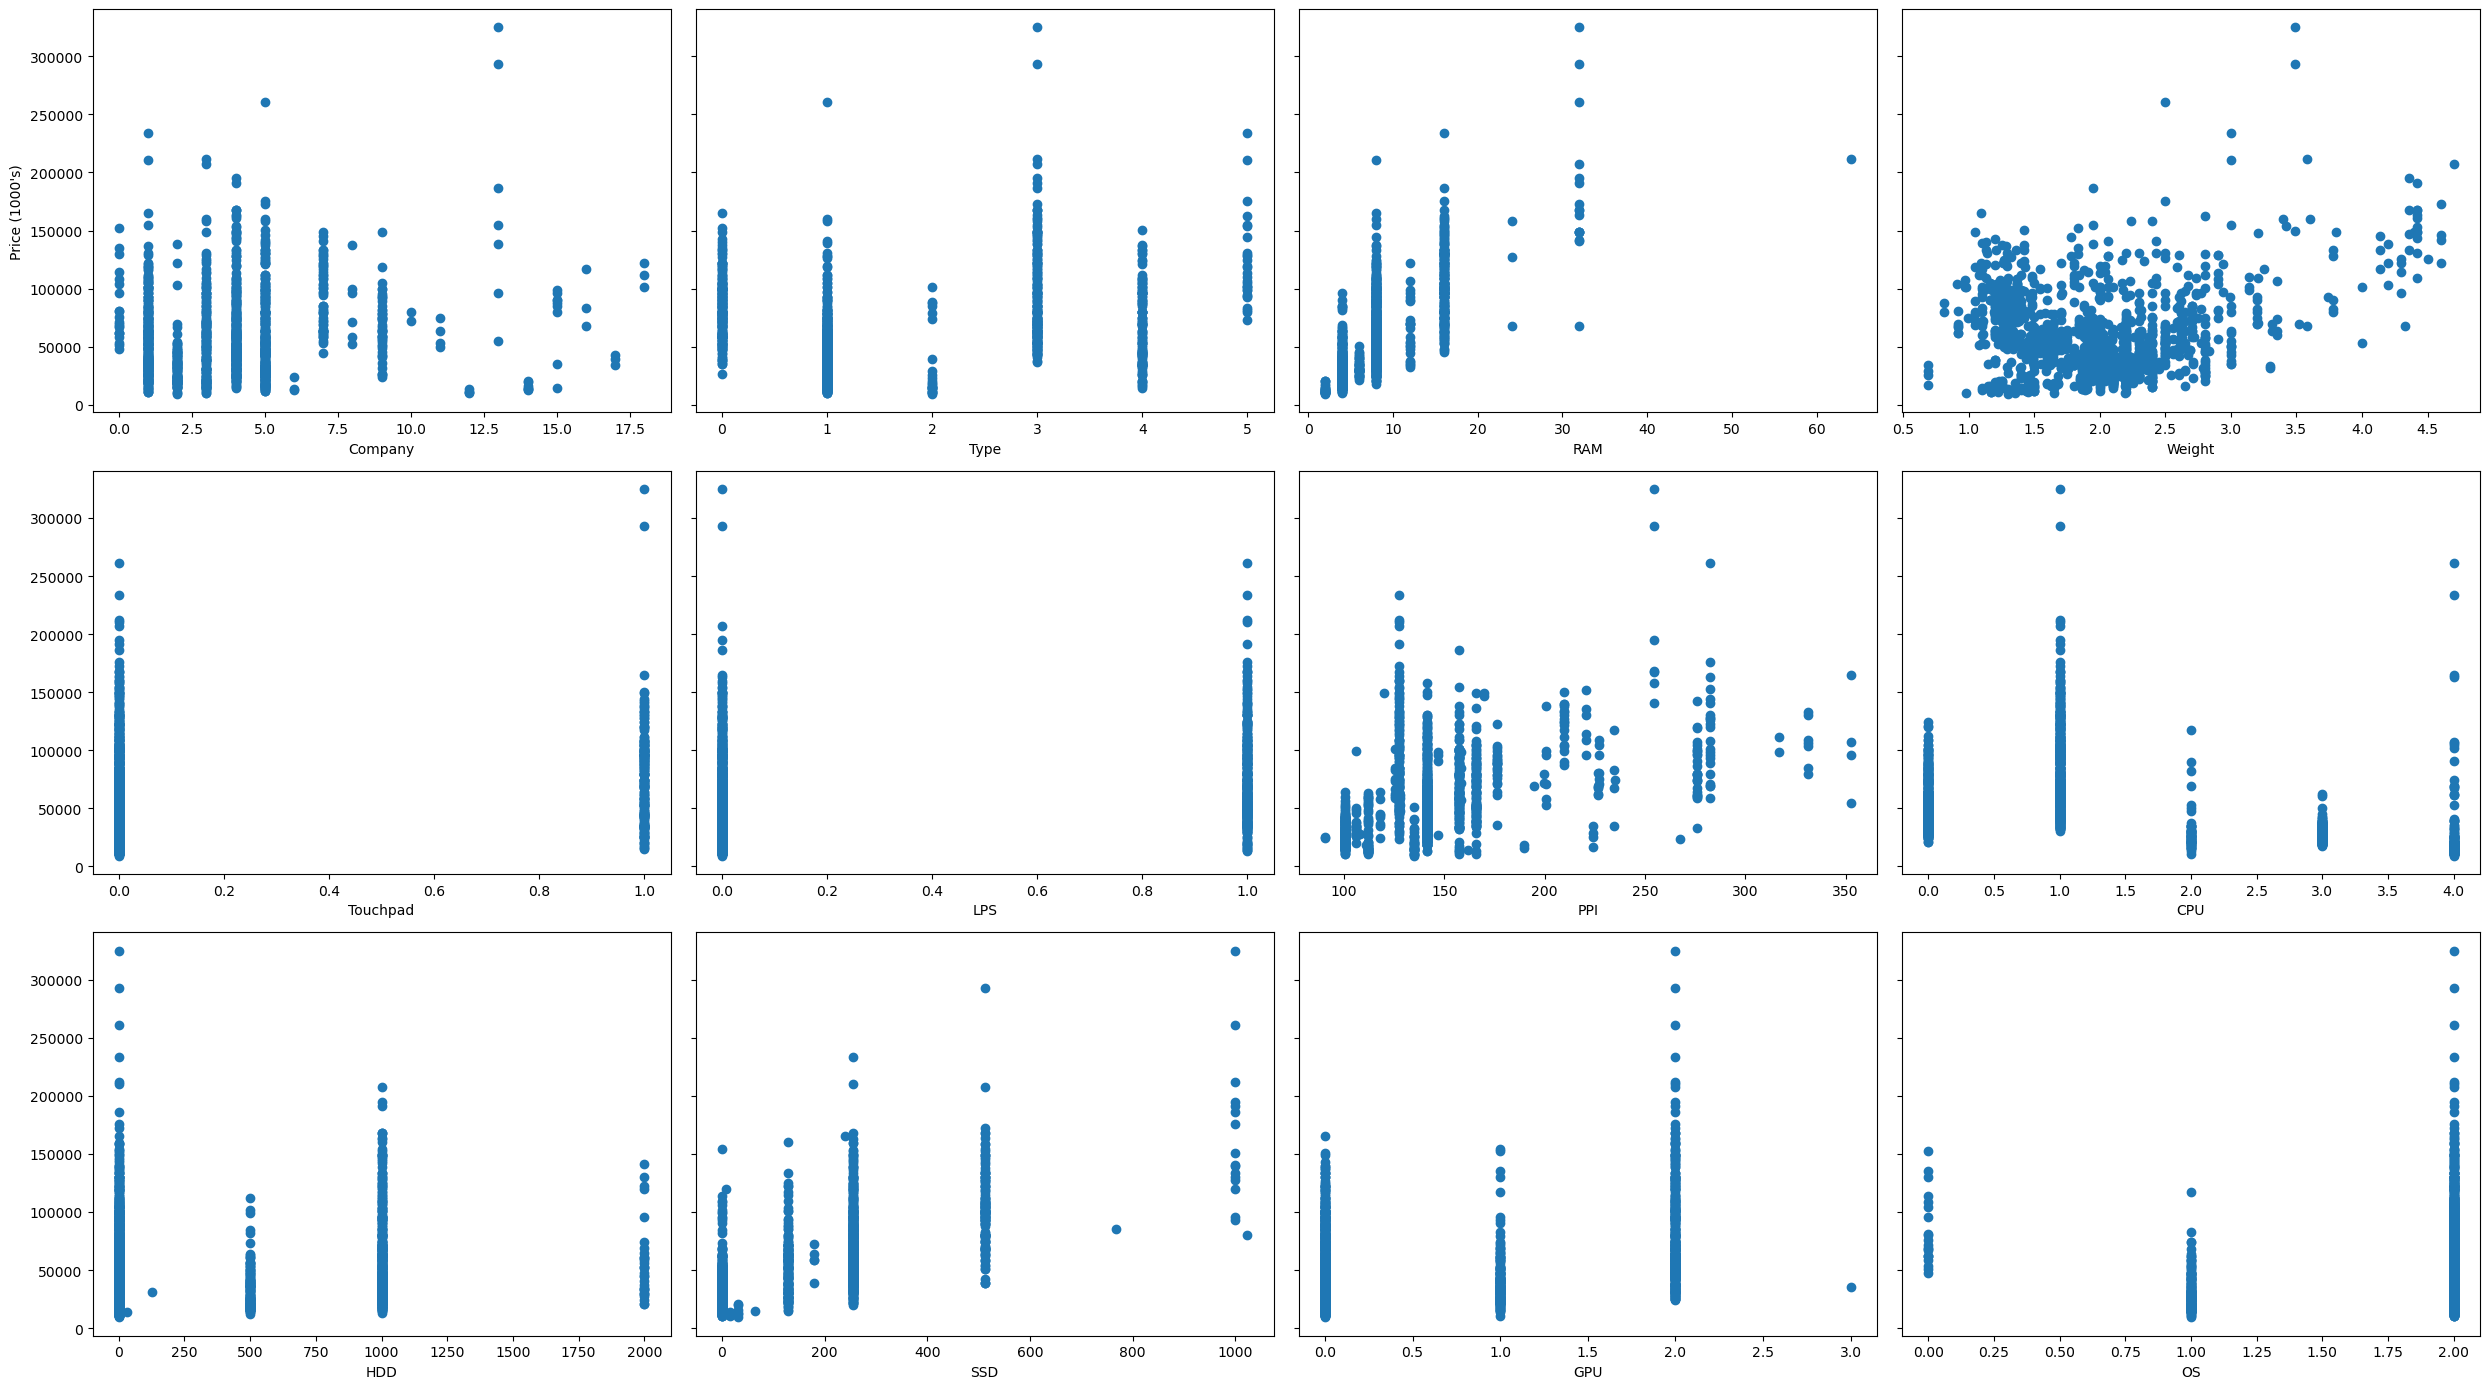

In [281]:
import matplotlib.pyplot as plt
import math

# Select the columns for X
X_columns = ['Company', 'Type', 'RAM', 'Weight', 'Touchpad', 'LPS', 'PPI', 'CPU', 'HDD', 'SSD', 'GPU', 'OS']

# Extract the X_train data based on these columns
X_train = df[X_columns].values

# Define the labels for the features
X_features = X_columns

# Define the target variable
y_train = df['Price']

# Calculate the number of rows and columns for subplots
num_features = len(X_features)
num_rows = math.ceil(num_features / 4)
num_cols = min(num_features, 4)

# Create subplots
fig, ax = plt.subplots(num_rows, num_cols, figsize=(25, 14), sharey=True)

# Flatten the ax array to iterate through it
ax = ax.flatten()

# Create scatter plots for each feature
for i in range(num_features):
    ax[i].scatter(X_train[:, i], y_train)
    ax[i].set_xlabel(X_features[i])

# Set common ylabel
ax[0].set_ylabel("Price (1000's)")

# Remove any empty subplots
for i in range(num_features, len(ax)):
    fig.delaxes(ax[i])

# Show the plot
plt.tight_layout()
plt.show()


In [258]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [259]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [260]:
def costFunc(X, y, w, b):
    m = X.shape[0]
    cost = 0.0

    for i in range(m):
        f_wb = np.dot(X[i],w)+b
        cost += abs(f_wb - y[i])
    cost = cost/(2*m)

    return cost

In [261]:
def computeGradient(x, y, w, b):
    m, n = x.shape

    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb = np.dot(x[i],w)+b
        err = (f_wb - y[i])
        for j in range(n):
            dj_dw[j] = dj_dw[j]+ err * x[i,j]
        dj_db += err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [262]:
def gradient_descent(x, y, w, b, alpha, iterations):
    J_hist = []  # Initialize a list to store cost values during iterations
    p_hist = []  # Initialize a list to store parameter values during iterations

    for i in range(iterations):
        dj_dw, dj_db = computeGradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = costFunc(x, y, w, b)

        J_hist.append(cost)
        p_hist.append((w, b))
    
#     print(p_hist)
    return w, b, J_hist

In [263]:
b_init = 0.0
# w_int = np.random.random_sample(12)
w_init = w_int.copy()
iterations = 2000
alpha = 1.0e-7

## Evaluating Training Dataset

In [264]:

w_final, b_final, J_hist = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations)

print(f"The final cost is {J_hist[-1]:.3f}")
print("The Final w is : ", [f"{x:.3f}" for x in w_final])
print(f"The Final b is : {b_final:.3f}")

The final cost is 9115.022
The Final w is :  ['5.435', '3.546', '16.430', '3.518', '0.321', '0.774', '159.760', '0.077', '20.195', '144.225', '1.428', '2.394']
The Final b is : 0.963


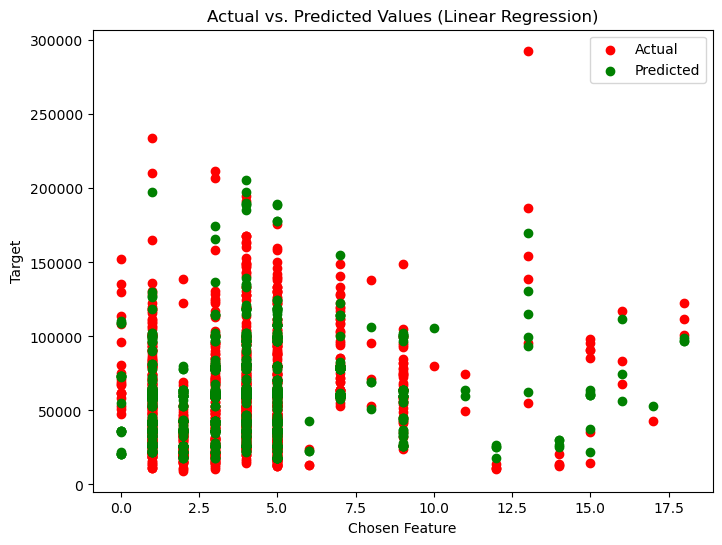

In [280]:

# Assuming you choose the first feature to plot against y_train
chosen_feature_index = 0  # Replace this with the index of the feature you want to plot

# Extract the chosen feature from x_train
chosen_feature = x_train[:, chosen_feature_index]

# Calculate predicted values for the chosen feature
y_train_predicted = np.dot(x_train, w_final) + b_final

# Plot actual vs. predicted values for the chosen feature
plt.figure(figsize=(8, 6))
plt.scatter(chosen_feature, y_train, label='Actual', color='red', marker='o')
plt.scatter(chosen_feature, y_train_predicted, label='Predicted', color='green', alpha=1)
plt.xlabel('Chosen Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.show()


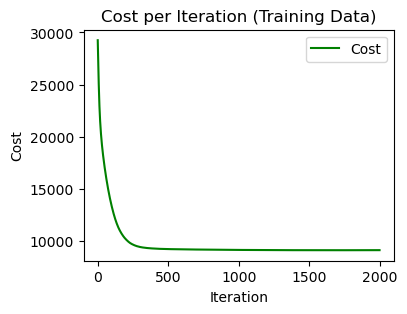

In [266]:
plt.figure(figsize=(4, 3))
plt.plot(range(iterations), J_hist, label='Cost', color='green')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost per Iteration (Training Data)')

plt.show()

In [267]:
y_train_predicted = np.dot(x_train, w_final) + b_final
df1 = pd.DataFrame({'Actual Price': y_train, 'Predicted Price':y_train_predicted})
df1

,Actual Price,Predicted Price
0,20986.9920,26230.712525
1,18328.3200,42853.660674
2,40705.9200,36366.137595
3,58554.7200,84090.389274
4,95850.7200,130497.933344
...,...,...
1037,42570.7200,79839.507026
1038,33513.1200,56592.051688
1039,29303.4672,22682.055073
1040,45323.1648,42931.772337


## Evaluating Testing Dataset

In [268]:
W_final, B_final, J_Hist= gradient_descent(x_test, y_test, w_init, b_init, alpha, iterations)

print(f"The final cost is {J_hist[-1]:.3f}")
print("The Final w is : ", [f"{x:.3f}" for x in w_final])
print(f"The Final b is : {b_final:.3f}")

The final cost is 9115.022
The Final w is :  ['5.435', '3.546', '16.430', '3.518', '0.321', '0.774', '159.760', '0.077', '20.195', '144.225', '1.428', '2.394']
The Final b is : 0.963


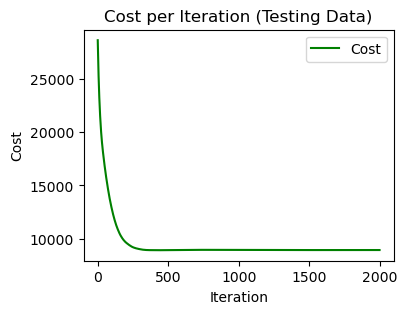

In [269]:
plt.figure(figsize=(4, 3))
plt.plot(range(iterations), J_Hist, label='Cost', color='green')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost per Iteration (Testing Data)')

plt.show()

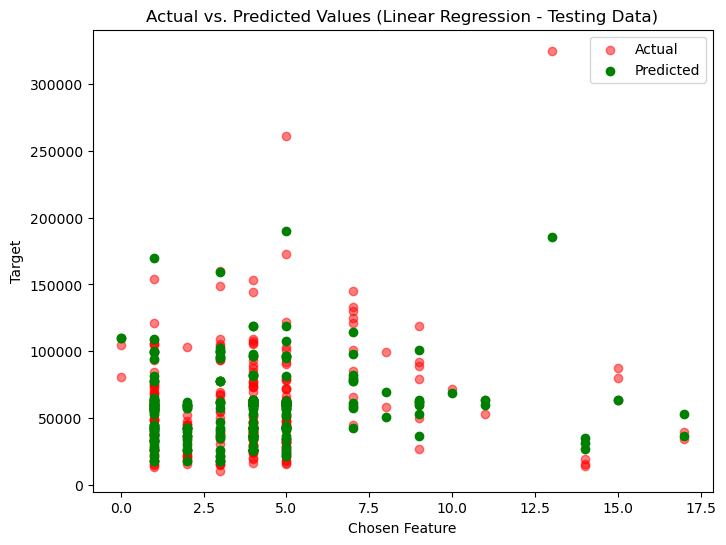

In [270]:
chosen_feature_index = 0
chosen_feature = x_test[:, chosen_feature_index]
y_test_predicted = np.dot(x_test, w_final) + b_final

plt.figure(figsize=(8, 6))
plt.scatter(chosen_feature, y_test, label='Actual', color='red', marker='o', alpha=0.5)
plt.scatter(chosen_feature, y_test_predicted, label='Predicted', color='green', alpha=1)
plt.xlabel('Chosen Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Actual vs. Predicted Values (Linear Regression - Testing Data)')
plt.show()


In [271]:
y_test_predicted = np.dot(x_test, W_final) + B_final
df2 = pd.DataFrame({'Actual Price': y_test, 'Predicted Price':y_test_predicted})

In [272]:
df2

,Actual Price,Predicted Price
0,89084.1600,63621.808425
1,61218.7200,63577.422562
2,26586.7200,40631.398199
3,47898.7200,40668.142206
4,66280.3200,58310.318228
...,...,...
256,69210.7200,63676.405666
257,55677.6000,58644.195630
258,153705.3408,58816.640538
259,103523.0400,111351.671861
